# Data Analysis

##### Import libraries

In [740]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplot graph won't pop up
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Load Data Set

In [741]:
my_data = pd.read_csv('/Users/deborabastos/Documents/3.DataScience/accenture_data_analytics/data/my_data.csv')
my_data

,Content ID,Reaction Type,Datetime,User ID (Post owner),Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30.0
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10.0
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45.0
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30.0
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12.0


##### Group by Category and sort by popularity

In [742]:
total_categories = my_data.groupby(by = 'Category', as_index= False)['Score'].sum()
total_categories_sort = total_categories.sort_values("Score", ascending=False)
total_categories_sort

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0
2,culture,66579.0
14,travel,64880.0
1,cooking,64756.0
10,soccer,57783.0
4,education,57436.0


##### Select 5 most popular categories

In [743]:
pop_categories = total_categories_sort[0:5]
pop_categories

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0


##### Plot 5 most popular categories

<AxesSubplot:xlabel='Score', ylabel='Category'>

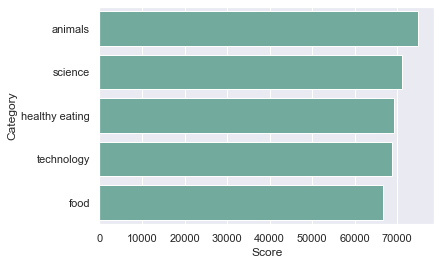

In [744]:
plt.figure(figsize=(6,4))
sns.barplot(data = pop_categories, y = 'Category', x = 'Score',
            order = pop_categories.sort_values('Score', ascending = False).Category,
            color='#69b3a2')

# All categories:
# sns.barplot(data = total_categories_sort, y = 'Category', x = 'Score')

##### Group by Content Type and sort by popularity

In [745]:
pop_content = my_data.groupby(by = 'Content Type', as_index= False)['Score'].sum()
pop_content_sort = pop_content.sort_values("Score", ascending=False)
pop_content_sort


,Content Type,Score
2,photo,262838.0
3,video,246463.0
0,GIF,238217.0
1,audio,226127.0


##### Plot Content by popularity

<AxesSubplot:xlabel='Content Type', ylabel='Score'>

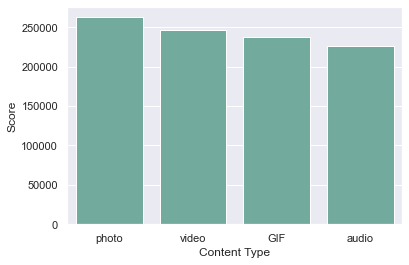

In [746]:
plt.figure(figsize=(6,4))
sns.barplot(data = pop_content_sort, x = 'Content Type', y = 'Score',
            color='#69b3a2')

##### Group by Content Type and sort by NUMBER of reactions

In [747]:
n_content = my_data.groupby(by = 'Content Type', as_index= False)['Score'].count()
n_content.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_content_sort = n_content.sort_values("Reactions count", ascending=False)
n_content_sort


,Content Type,Reactions count
2,photo,6589
3,video,6245
0,GIF,6079
1,audio,5660


##### Plot Content Type by NUMBER of reactions

<AxesSubplot:xlabel='Content Type', ylabel='Reactions count'>

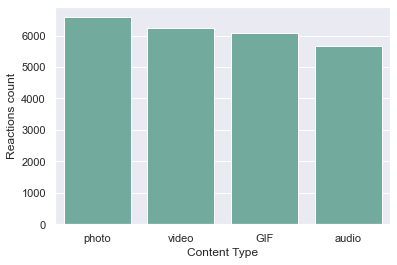

In [748]:
plt.figure(figsize=(6,4))
sns.barplot(data = n_content_sort, x = 'Content Type', y = 'Reactions count',
            color='#69b3a2')

##### Group by Sentiments and sort by NUMBER of reactions

In [749]:
n_sentiment = my_data.groupby(by = 'Sentiment', as_index= False)['Score'].count()
n_sentiment.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_sentiment_sort = n_sentiment.sort_values("Reactions count", ascending=False)
n_sentiment_sort

,Sentiment,Reactions count
2,positive,13807
0,negative,7695
1,neutral,3071


##### Plot Sentiments by NUMBER of reactions

<AxesSubplot:xlabel='Sentiment', ylabel='Reactions count'>

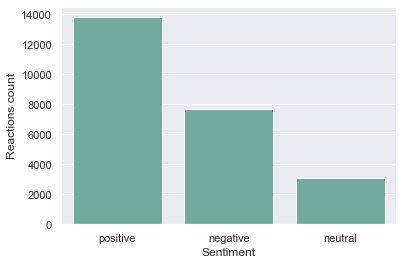

In [751]:
plt.figure(figsize=(6,4))
sns.barplot(data = n_sentiment_sort, x = 'Sentiment', y = 'Reactions count',
            color='#69b3a2')

##### Group by Reaction Type and sort by NUMBER of reactions

In [ ]:
n_reaction_type = my_data.groupby(by = 'Reaction Type', as_index= False)['Score'].count()
n_reaction_type.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_reaction_type_sort = n_reaction_type.sort_values("Reactions count", ascending=False)
n_reaction_type_sort

##### Plot Reaction Type by NUMBER of reactions

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(data = n_reaction_type_sort, x = 'Reaction Type', y = 'Reactions count',
            color='#69b3a2')

##### Categories by Reaction Type popularity

In [ ]:
# Fazer mapa de calor por linha???

pt_reaction_type = pd.pivot_table(data=my_data, index="Category", columns="Reaction Type", aggfunc='sum')
pt_reaction_type

##### Group by content

In [ ]:
total_content = my_data.groupby(["Content ID", "Category"]).sum("Score")

In [ ]:
# Sort by most popular content
total_content.sort_values("Score", ascending=False)

In [ ]:
# Check if total score is the same for total_categories and total_contet 
total_categories['Score'].sum()

In [ ]:
total_content['Score'].sum()

In [ ]:
# Checking 
my_data.groupby(["Content ID", "Category", "Sentiment"])[["Sentiment"]].count()

# Verificar reações por dia de semana (horário? Manhã, Tarde, Noite)
# 